In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:

base_url = "https://matsda2sh.com/list/26/%D8%A7%D8%AC%D8%AA%D9%85%D8%A7%D8%B9%D9%8A?page={}"

# Function to extract links from a given page
def extract_links_from_page(url):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    media_elements = soup.find_all("div", class_="media")
    links = []
    for media_element in media_elements:
        anchor_tags = media_element.find_all("a", href=True)
        for anchor_tag in anchor_tags:
            link = anchor_tag["href"]
            links.append(link)
    return links

# Function to scrape specified classes from a given link's page
def scrape_classes_from_link(url):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract title
    title_element = soup.find("div", class_="det-m").find("h1")
    title = title_element.text.strip() if title_element else "Title not found"

    # Extract time
    time_element = soup.find("span", class_="date")
    time = time_element.text.strip() if time_element else ""

    # Extract category
    category_element = soup.find('span', style='color: #088B6B')
    category = category_element.text.strip() if category_element else ""

    # Scrape class="wekek blog-section references-section" and label as "fake"
    fake_elements = soup.find_all("div", class_="wekek blog-section references-section")
    fakes = [fake.text.strip() for fake in fake_elements]

    # Scrape class="wp-editor conclusion-ddd" and label as "true"
    true_elements = soup.find_all("div", class_="wp-editor conclusion-ddd")
    trues = [true.text.strip() for true in true_elements]

    return title, time, category, fakes, trues

# Get the number of pages (you can get this information programmatically or manually)
num_pages = 1

# Initialize an empty list to store dictionaries
data_list = []

# Scrape data from all pages and store in the list
for page_number in range(1, num_pages + 1):
    url = base_url.format(page_number)
    links_on_page = extract_links_from_page(url)
    for link in links_on_page:
        title, time, category, fakes, trues = scrape_classes_from_link(link)
        data = {
            "Title": title,
            "Time": time,
            "Category": category,
            "Link": link,
            "Fake News": fakes,
            "Fact News": trues
        }
        data_list.append(data)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)




In [3]:
df

Title           Time  \
0  "ŸÖŸà ÿ≥ŸäŸÑŸÅÿß" ŸÖŸÜ ŸáŸà ÿßŸÑŸÖÿ™ŸáŸÖ ÿ®ÿ™ÿ±ŸàŸäÿ¨ ÿ£ÿÆÿ®ÿßÿ± ŸÉÿßÿ∞ÿ®ÿ© ÿπŸÜ ...  Mar. 11, 2024   
1  ÿ®ÿπÿ∂Ÿáÿß ÿ≤ÿßÿØ ÿ®ŸÜÿ≥ÿ® ÿ™ÿ™ÿ¨ÿßŸàÿ≤ 600%.. ŸÉŸäŸÅ ÿßÿ±ÿ™ŸÅÿπÿ™ ÿ±ÿ≥ŸàŸÖ ÿß...  Mar. 05, 2024   
2  ÿπŸÜ ÿßŸÑÿ≥ŸÉÿ± ŸàÿßŸÑÿØÿπŸÖ Ÿàÿ™ÿµŸÜŸäŸÅ ŸÖÿµÿ± ŸÅŸä "ÿßŸÑÿ£ŸÖŸÜ ÿßŸÑÿ∫ÿ∞ÿßÿ¶Ÿä"....  Feb. 21, 2024   
3     ÿ≠ŸÇŸäŸÇÿ© ÿ™ÿµÿ±Ÿäÿ≠ÿßÿ™ ÿ≠ŸÖÿØŸä ÿ±ÿ≤ŸÇ ÿ≠ŸàŸÑ ÿπÿØÿØ ÿßŸÑŸÑÿßÿ¨ÿ¶ŸäŸÜ ŸÅŸä ŸÖÿµÿ±  Feb. 21, 2024   
4  "ÿßŸÑÿ®ÿ∑ÿßŸÑÿ©" ŸÅŸä ŸÖÿµÿ± |  ÿßŸÜÿÆŸÅÿßÿ∂ ŸàŸÑŸÉŸÜ..  ŸÖÿß ÿ™ÿ™ÿ¨ÿßŸáŸÑŸá ...  Feb. 18, 2024   
5  "ŸÑÿß ÿ£ŸÖŸÑŸÉ ÿßŸÑŸÖÿßŸÑ ŸÑÿ¥ÿ±ÿßÿ° ÿßŸÑŸÅŸàÿ∑ ÿßŸÑÿµÿ≠Ÿäÿ©".. ŸÜÿ≥ÿßÿ° Ÿäÿ≥ÿ™ÿÆ...  Feb. 18, 2024   
6    ÿ≠ŸÇŸäŸÇÿ© ÿ™ÿµÿ±Ÿäÿ≠ÿßÿ™ ŸÅÿßÿ±ŸàŸÇ ÿ¨ŸàŸäÿØÿ© ÿπŸÜ ŸÜÿ≥ÿ®ÿ© ÿßŸÑÿ£ŸÖŸäÿ© ŸÅŸä ŸÖÿµÿ±  Feb. 11, 2024   
7  ŸÑÿ£ŸÜ ÿßŸÑÿ™ÿ∂ÿÆŸÖ ŸàÿßŸÑÿØŸàŸÑÿßÿ± ŸäŸÑÿ™ŸáŸÖÿßŸÜ ŸÉŸÑ ÿ¥Ÿäÿ°..  ÿ≤ŸäÿßÿØÿ© ÿ¨ÿØ...  Feb. 09, 2024   

    Category                                               Link  \
0  - ÿßÿ¨ÿ™ŸÖÿßÿπŸä  https://matsda2sh.com/details/13210/-%D9%85%D9...   
1  - ÿßÿ¨ÿ™ŸÖÿßÿπŸä  https://matsda2sh.com/details/13202/%D8%A8%D8%...   
2  - ÿßÿ¨ÿ™ŸÖÿßÿπŸä  https://matsda2sh.com/details/13184/%D8%B9%D9%...   
3  - ÿßÿ¨ÿ™ŸÖÿßÿπŸä  https://matsda2sh.com/details/13183/%D8%AD%D9%...   
4  - ÿßÿ¨ÿ™ŸÖÿßÿπŸä  https://matsda2sh.com/details/13175/-%D8%A7%D9...   
5  - ÿßÿ¨ÿ™ŸÖÿßÿπŸä  https://matsda2sh.com/details/13181/-%D9%84%D8...   
6  - ÿßÿ¨ÿ™ŸÖÿßÿπŸä  https://matsda2sh.com/details/13164/%D8%AD%D9%...   
7  - ÿßÿ¨ÿ™ŸÖÿßÿπŸä  https://matsda2sh.com/details/13162/%D9%84%D8%...   

                                           Fake News  \
0                                                 []   
1                                                 []   
2  [ÿßŸÑÿ•ÿØÿπÿßÿ°\nÿÆŸÑÿßŸÑ ŸÑŸÇÿßÿ¶Ÿá ŸÖÿπ ÿ®ÿ±ŸÜÿßŸÖÿ¨ "ÿ®ÿßŸÑŸàÿ±ŸÇÿ© ŸàÿßŸÑŸÇŸÑŸÖ...   
3  [ÿßŸÑÿ•ÿØÿπÿßÿ°\n"ŸÑŸÜ ŸÜÿ™ÿ≠ÿØÿ´ ÿπŸÜ ÿßÿ≠ÿ™ÿ∂ÿßŸÜ ŸÖÿß Ÿäÿ±ÿ®Ÿà ÿπŸÑŸâ 9 ŸÖŸÑ...   
4  [ÿ™ÿ≠ŸÇŸäŸÇ ŸÖÿ™ÿµÿØŸÇÿ¥\nüìå ŸäŸàŸÖ ÿßŸÑÿÆŸÖŸäÿ≥ 15 ŸÅÿ®ÿ±ÿßŸäÿ± 2024ÿå ÿ£ÿπ...   
5                                                 []   
6  [ÿßŸÑÿ•ÿØÿπÿßÿ°\n"ŸÅŸäŸá ÿ£ŸÉÿ´ÿ± ŸÖŸÜ Ÿ£Ÿ† ŸÖŸÑŸäŸàŸÜÿß ( ŸÅŸä ŸÖÿµÿ±) ŸÑÿß ...   
7                                                 []   

                                           Fact News  
0  [üìå¬† ÿ®ÿπÿØ ÿ£ŸäÿßŸÖ ŸÖŸÜ ÿ•ÿπŸÑÿßŸÜ ÿßŸÑŸÜŸäÿßÿ®ÿ© ÿßŸÑÿπÿßŸÖÿ© ÿßŸÑÿ™ÿ≠ŸÇŸäŸÇ ŸÅ...  
1  [üìå ŸàÿßŸÅŸÇ ŸÖÿ¨ŸÑÿ≥ ÿßŸÑŸÜŸàÿßÿ® ŸäŸàŸÖ ÿßŸÑÿ£ÿ≠ÿØ 25 ŸÅÿ®ÿ±ÿßŸäÿ± 2024ÿå ...  
2  [‚≠ïÔ∏è ÿßŸÑÿÆÿ∑ÿ£ ÿßŸÑÿ£ŸàŸÑ: "ÿ™ÿµŸÜŸäŸÅ ŸÖÿµÿ± ŸÅŸä ŸÖÿ§ÿ¥ÿ± ÿßŸÑÿ£ŸÖŸÜ ÿßŸÑÿ∫ÿ∞...  
3  [ÿßŸÑÿ™ÿµÿ≠Ÿäÿ≠: ‚¨áÔ∏è‚¨áÔ∏è\n\n‚óæ ŸÉŸÑÿßŸÖ ÿ≠ŸÖÿØŸä ÿ±ÿ≤ŸÇ ÿ∫Ÿäÿ± ÿØŸÇŸäŸÇÿå ÿ≠Ÿä...  
4                                                 []  
5  [ÿ£ÿØŸâ ÿßÿ±ÿ™ŸÅÿßÿπ #ÿßÿ≥ÿπÿßÿ± ÿßŸÑŸÅŸàÿ∑ ÿßŸÑÿµÿ≠Ÿäÿ©ÿå ÿßŸÑÿ™Ÿä ÿ™ÿ≥ÿ™ÿÆÿØŸÖŸáÿß...  
6  [‚óæÿßŸÑŸÉŸÑÿßŸÖ ÿØŸá ÿ∫Ÿäÿ± ÿØŸÇŸäŸÇ. ‚úÖ\n‚óæŸäÿ®ŸÑÿ∫ ÿπÿØÿØ ÿßŸÑÿ£ŸÖŸäŸäŸÜ ŸÅŸä ...  
7  [üìå "ŸÅŸä ÿ£ŸÉÿ®ÿ± ÿ≠ÿ≤ŸÖÿ© ÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ© ÿπÿßÿ¨ŸÑÿ©"ÿå ŸÇÿ±ÿ± ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿπ...

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to extract links from a given page
def extract_links_from_page(url):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    media_elements = soup.find_all("div", class_="media")
    links = []
    for media_element in media_elements:
        anchor_tags = media_element.find_all("a", href=True)
        for anchor_tag in anchor_tags:
            link = anchor_tag["href"]
            links.append(link)
    return links

# Function to scrape specified classes from a given link's page
def scrape_classes_from_link(url):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract title
    title_element = soup.find("div", class_="det-m").find("h1")
    title = title_element.text.strip() if title_element else "Title not found"

    # Extract time
    time_element = soup.find("span", class_="date")
    time = time_element.text.strip() if time_element else ""

    # Extract category
    category_element = soup.find('span', style='color: #088B6B')
    category = category_element.text.strip() if category_element else ""

    # Scrape class="wekek blog-section references-section" and label as "fake"
    fake_elements = soup.find_all("div", class_="wekek blog-section references-section")
    fakes = [fake.text.strip() for fake in fake_elements]

    # Scrape class="wp-editor conclusion-ddd" and label as "true"
    true_elements = soup.find_all("div", class_="wp-editor conclusion-ddd")
    trues = [true.text.strip() for true in true_elements]

    return title, time, category, fakes, trues

# Define base URLs and number of pages for different categories
category_info = {
    "Social": ("https://matsda2sh.com/list/26/%D8%A7%D8%AC%D8%AA%D9%85%D8%A7%D8%B9%D9%8A?page={}", 51),
    "Sport": ("https://matsda2sh.com/list/146/%D8%B1%D9%8A%D8%A7%D8%B6%D8%A9?page={}", 52),
    "Economy": ("https://matsda2sh.com/list/166/%D8%A7%D9%82%D8%AA%D8%B5%D8%A7%D8%AF?page={}", 43),
    "Technology": ("https://matsda2sh.com/list/88/%D8%AA%D9%83%D9%86%D9%88%D9%84%D9%88%D8%AC%D9%8A%D8%A7?page={}", 6),
    "Politics": ("https://matsda2sh.com/list/46/%D8%B3%D9%8A%D8%A7%D8%B3%D9%8A?page={}", 95),
    "Science": ("https://matsda2sh.com/list/34/%D8%B9%D9%84%D9%88%D9%85?page={}", 14)
}

# Initialize an empty list to store dictionaries
data_list = []

# Scrape data from all pages and store in the list
for category, (base_url, num_pages) in category_info.items():
    for page_number in range(1, num_pages + 1):
        url = base_url.format(page_number)
        links_on_page = extract_links_from_page(url)
        for link in links_on_page:
            title, time, _, fakes, trues = scrape_classes_from_link(link)
            data = {
                "Title": title,
                "Time": time,
                "Category": category,
                 "Link": link,
                "Fake News": fakes,
                "Fact News": trues
            }
            data_list.append(data)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)



                                                  Title           Time  \
0     "ŸÖŸà ÿ≥ŸäŸÑŸÅÿß" ŸÖŸÜ ŸáŸà ÿßŸÑŸÖÿ™ŸáŸÖ ÿ®ÿ™ÿ±ŸàŸäÿ¨ ÿ£ÿÆÿ®ÿßÿ± ŸÉÿßÿ∞ÿ®ÿ© ÿπŸÜ ...  Mar. 11, 2024   
1     ÿ®ÿπÿ∂Ÿáÿß ÿ≤ÿßÿØ ÿ®ŸÜÿ≥ÿ® ÿ™ÿ™ÿ¨ÿßŸàÿ≤ 600%.. ŸÉŸäŸÅ ÿßÿ±ÿ™ŸÅÿπÿ™ ÿ±ÿ≥ŸàŸÖ ÿß...  Mar. 05, 2024   
2     ÿπŸÜ ÿßŸÑÿ≥ŸÉÿ± ŸàÿßŸÑÿØÿπŸÖ Ÿàÿ™ÿµŸÜŸäŸÅ ŸÖÿµÿ± ŸÅŸä "ÿßŸÑÿ£ŸÖŸÜ ÿßŸÑÿ∫ÿ∞ÿßÿ¶Ÿä"....  Feb. 21, 2024   
3        ÿ≠ŸÇŸäŸÇÿ© ÿ™ÿµÿ±Ÿäÿ≠ÿßÿ™ ÿ≠ŸÖÿØŸä ÿ±ÿ≤ŸÇ ÿ≠ŸàŸÑ ÿπÿØÿØ ÿßŸÑŸÑÿßÿ¨ÿ¶ŸäŸÜ ŸÅŸä ŸÖÿµÿ±  Feb. 21, 2024   
4     "ÿßŸÑÿ®ÿ∑ÿßŸÑÿ©" ŸÅŸä ŸÖÿµÿ± |  ÿßŸÜÿÆŸÅÿßÿ∂ ŸàŸÑŸÉŸÜ..  ŸÖÿß ÿ™ÿ™ÿ¨ÿßŸáŸÑŸá ...  Feb. 18, 2024   
...                                                 ...            ...   
2067  ÿ≠ŸÇŸäŸÇÿ© ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÑŸÖÿµÿ±Ÿä ŸÖÿ≠ŸÖÿØ ÿ≥ŸÜÿØ ÿßŸÑÿ∞Ÿä ÿßÿÆÿ™ÿ±ÿπ ŸáŸàÿßÿ¶Ÿä ...  Sep. 20, 2018   
2068      ÿ≠ŸÇŸäŸÇÿ© ÿßŸÜÿ™ŸÖÿßÿ° ÿ¨ŸÖÿßÿ¨ŸÖ ÿ™ÿßÿ®Ÿàÿ™ ÿßŸÑÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ŸÑÿ¥ÿÆÿµ Ÿàÿßÿ≠ÿØ  Jul. 22, 2018   
2069                    ÿ®Ÿäÿ∂ ÿ®ŸÑÿßÿ≥ÿ™ŸäŸÉ ŸÖŸÜ ÿßŸÑÿµŸäŸÜ ŸÅŸä ÿßŸÑÿ£ÿ≥ŸàÿßŸÇ  Ju

In [7]:
df

Title           Time  \
0     "ŸÖŸà ÿ≥ŸäŸÑŸÅÿß" ŸÖŸÜ ŸáŸà ÿßŸÑŸÖÿ™ŸáŸÖ ÿ®ÿ™ÿ±ŸàŸäÿ¨ ÿ£ÿÆÿ®ÿßÿ± ŸÉÿßÿ∞ÿ®ÿ© ÿπŸÜ ...  Mar. 11, 2024   
1     ÿ®ÿπÿ∂Ÿáÿß ÿ≤ÿßÿØ ÿ®ŸÜÿ≥ÿ® ÿ™ÿ™ÿ¨ÿßŸàÿ≤ 600%.. ŸÉŸäŸÅ ÿßÿ±ÿ™ŸÅÿπÿ™ ÿ±ÿ≥ŸàŸÖ ÿß...  Mar. 05, 2024   
2     ÿπŸÜ ÿßŸÑÿ≥ŸÉÿ± ŸàÿßŸÑÿØÿπŸÖ Ÿàÿ™ÿµŸÜŸäŸÅ ŸÖÿµÿ± ŸÅŸä "ÿßŸÑÿ£ŸÖŸÜ ÿßŸÑÿ∫ÿ∞ÿßÿ¶Ÿä"....  Feb. 21, 2024   
3        ÿ≠ŸÇŸäŸÇÿ© ÿ™ÿµÿ±Ÿäÿ≠ÿßÿ™ ÿ≠ŸÖÿØŸä ÿ±ÿ≤ŸÇ ÿ≠ŸàŸÑ ÿπÿØÿØ ÿßŸÑŸÑÿßÿ¨ÿ¶ŸäŸÜ ŸÅŸä ŸÖÿµÿ±  Feb. 21, 2024   
4     "ÿßŸÑÿ®ÿ∑ÿßŸÑÿ©" ŸÅŸä ŸÖÿµÿ± |  ÿßŸÜÿÆŸÅÿßÿ∂ ŸàŸÑŸÉŸÜ..  ŸÖÿß ÿ™ÿ™ÿ¨ÿßŸáŸÑŸá ...  Feb. 18, 2024   
...                                                 ...            ...   
2067  ÿ≠ŸÇŸäŸÇÿ© ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÑŸÖÿµÿ±Ÿä ŸÖÿ≠ŸÖÿØ ÿ≥ŸÜÿØ ÿßŸÑÿ∞Ÿä ÿßÿÆÿ™ÿ±ÿπ ŸáŸàÿßÿ¶Ÿä ...  Sep. 20, 2018   
2068      ÿ≠ŸÇŸäŸÇÿ© ÿßŸÜÿ™ŸÖÿßÿ° ÿ¨ŸÖÿßÿ¨ŸÖ ÿ™ÿßÿ®Ÿàÿ™ ÿßŸÑÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ© ŸÑÿ¥ÿÆÿµ Ÿàÿßÿ≠ÿØ  Jul. 22, 2018   
2069                    ÿ®Ÿäÿ∂ ÿ®ŸÑÿßÿ≥ÿ™ŸäŸÉ ŸÖŸÜ ÿßŸÑÿµŸäŸÜ ŸÅŸä ÿßŸÑÿ£ÿ≥ŸàÿßŸÇ  Jul. 15, 2018   
2070             ÿ≠ŸÇŸäŸÇÿ© ÿßŸÉÿ™ŸÖÿßŸÑ ÿßŸÑŸÇŸÖÿ± ŸÇÿ®ŸÑ ŸÖŸäÿπÿßÿØŸá ŸÅŸä ÿ±ŸÖÿ∂ÿßŸÜ  May. 30, 2018   
2071                  ÿ∏ŸáŸàÿ± ÿ£ÿÆÿ∑ÿ± ÿ≠ÿ¥ÿ±ÿ© ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ ÿ®ÿßŸÑŸÖÿπÿßÿØŸä  May. 22, 2018   

     Category                                               Link  \
0      Social  https://matsda2sh.com/details/13210/-%D9%85%D9...   
1      Social  https://matsda2sh.com/details/13202/%D8%A8%D8%...   
2      Social  https://matsda2sh.com/details/13184/%D8%B9%D9%...   
3      Social  https://matsda2sh.com/details/13183/%D8%AD%D9%...   
4      Social  https://matsda2sh.com/details/13175/-%D8%A7%D9...   
...       ...                                                ...   
2067  Science  https://matsda2sh.com/details/5870/%D8%AD%D9%8...   
2068  Science  https://matsda2sh.com/details/8871/%D8%AD%D9%8...   
2069  Science  https://matsda2sh.com/details/8940/%D8%A8%D9%8...   
2070  Science  https://matsda2sh.com/details/8767/%D8%AD%D9%8...   
2071  Science  https://matsda2sh.com/details/8819/%D8%B8%D9%8...   

                                              Fake News  \
0                                                    []   
1                                                    []   
2     [ÿßŸÑÿ•ÿØÿπÿßÿ°\nÿÆŸÑÿßŸÑ ŸÑŸÇÿßÿ¶Ÿá ŸÖÿπ ÿ®ÿ±ŸÜÿßŸÖÿ¨ "ÿ®ÿßŸÑŸàÿ±ŸÇÿ© ŸàÿßŸÑŸÇŸÑŸÖ...   
3     [ÿßŸÑÿ•ÿØÿπÿßÿ°\n"ŸÑŸÜ ŸÜÿ™ÿ≠ÿØÿ´ ÿπŸÜ ÿßÿ≠ÿ™ÿ∂ÿßŸÜ ŸÖÿß Ÿäÿ±ÿ®Ÿà ÿπŸÑŸâ 9 ŸÖŸÑ...   
4     [ÿ™ÿ≠ŸÇŸäŸÇ ŸÖÿ™ÿµÿØŸÇÿ¥\nüìå ŸäŸàŸÖ ÿßŸÑÿÆŸÖŸäÿ≥ 15 ŸÅÿ®ÿ±ÿßŸäÿ± 2024ÿå ÿ£ÿπ...   
...                                                 ...   
2067  [ÿßŸÑÿ•ÿØÿπÿßÿ°\n- ÿµŸÅÿ≠ÿ© ÿßÿ≥ŸÖŸáÿß "ÿ•ÿ≤ÿπÿßÿ¨ ÿπŸÑŸÖŸä" ŸÜÿßÿ¥ÿ±Ÿá ŸÅŸäÿØŸä...   
2068  [ÿßŸÑÿ•ÿØÿπÿßÿ°\n- ÿÆÿ®ÿ± ŸÖŸÜÿ™ÿ¥ÿ± ÿ®ÿ¥ŸÉŸÑ ŸÉÿ®Ÿäÿ± ÿ¨ÿØŸãÿß ŸÖŸÜÿ≥Ÿàÿ® ŸÑÿ¨ÿ±...   
2069                                                 []   
2070  [ÿßŸÑÿ•ÿØÿπÿßÿ°\n- ŸÅŸä ÿßŸÑÿ≥ÿßÿπÿßÿ™ ÿßŸÑŸÑŸâ ŸÅÿßÿ™ÿ™ ÿ®ÿπÿ∂ ÿßŸÑŸÜÿßÿ≥ ŸÜÿ¥ÿ±...   
2071  [ÿßŸÑÿ•ÿØÿπÿßÿ°\n- ÿ®Ÿàÿ≥ÿ™ ÿßŸÜÿ™ÿ¥ÿ± ÿ®ÿ¥ŸÉŸÑ ŸÉÿ®Ÿäÿ± ÿ¨ÿØŸãÿß ÿßŸÑŸäŸàŸÖŸäŸÜ ...   

                                              Fact News  
0     [üìå¬† ÿ®ÿπÿØ ÿ£ŸäÿßŸÖ ŸÖŸÜ ÿ•ÿπŸÑÿßŸÜ ÿßŸÑŸÜŸäÿßÿ®ÿ© ÿßŸÑÿπÿßŸÖÿ© ÿßŸÑÿ™ÿ≠ŸÇŸäŸÇ ŸÅ...  
1     [üìå ŸàÿßŸÅŸÇ ŸÖÿ¨ŸÑÿ≥ ÿßŸÑŸÜŸàÿßÿ® ŸäŸàŸÖ ÿßŸÑÿ£ÿ≠ÿØ 25 ŸÅÿ®ÿ±ÿßŸäÿ± 2024ÿå ...  
2     [‚≠ïÔ∏è ÿßŸÑÿÆÿ∑ÿ£ ÿßŸÑÿ£ŸàŸÑ: "ÿ™ÿµŸÜŸäŸÅ ŸÖÿµÿ± ŸÅŸä ŸÖÿ§ÿ¥ÿ± ÿßŸÑÿ£ŸÖŸÜ ÿßŸÑÿ∫ÿ∞...  
3     [ÿßŸÑÿ™ÿµÿ≠Ÿäÿ≠: ‚¨áÔ∏è‚¨áÔ∏è\n\n‚óæ ŸÉŸÑÿßŸÖ ÿ≠ŸÖÿØŸä ÿ±ÿ≤ŸÇ ÿ∫Ÿäÿ± ÿØŸÇŸäŸÇÿå ÿ≠Ÿä...  
4                                                    []  
...                                                 ...  
2067  [‚Äì ÿßŸÑÿµŸÅÿ≠ÿ© ŸÖÿ¥ŸáŸàÿ±ÿ© ÿ®ŸÜÿ¥ÿ± ŸÅŸäÿØŸäŸàŸáÿßÿ™ ÿ™ÿ±ŸäŸÇÿ© ÿπŸÑŸâ ‚ÄúÿßŸÑŸÖÿÆ...  
2068  [‚Äì ÿßŸÑŸÉŸÑÿßŸÖ ÿØŸá ŸÖÿ¥ ÿ≠ŸÇŸäŸÇŸäÿå ŸÖÿ≠ÿØÿ¥ ŸÖŸÜ Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ¢ÿ´ÿßÿ± ŸÇÿß...  
2069  [ÿ¨ÿßŸÑŸÜÿß ÿ£ÿ≥ÿ¶ŸÑÿ© ŸÉÿ™Ÿäÿ± ÿ¨ÿØŸãÿß ÿπŸÜ ŸÖŸàÿ∂Ÿàÿπ ‚ÄúÿßŸÑÿ®Ÿäÿ∂ ÿßŸÑÿ®ŸÑÿßÿ≥ÿ™...  
2070  [‚Äì ŸÖÿ±ŸÉÿ≤ ÿßŸÑŸÅŸÑŸÉ ÿßŸÑÿØŸàŸÑŸä ŸÇÿßŸÑ ÿ•ŸÜŸá ŸÑÿß ŸäŸÖŸÉŸÜ ÿßŸÑÿßÿπÿ™ŸÖÿßÿØ ...  
2071  [‚Äì ÿßŸÑŸÉŸÑÿßŸÖ ÿØŸá ŸÉŸÑŸá ÿßÿ¥ÿßÿπÿ© ŸÉÿßÿ∞ÿ®ÿ© ÿ™ŸÖÿßŸÖÿß‚ùå‚ùå.\n‚Äì Ÿàÿ≤ÿßÿ±ÿ©...  

[2072 rows x 6 columns]

In [8]:
summary_stats = df.describe()
summary_stats


Title           Time  \
count                                                2072           2072   
unique                                               1968           1030   
top     ÿ≠ŸÇŸäŸÇÿ© ÿ™ÿµÿ±Ÿäÿ≠ ÿØ/ ŸÖÿµÿ∑ŸÅŸâ ÿ®ÿØÿ±ÿ© ÿπŸÜ ÿ™ŸÉŸÑŸÅÿ© ÿ•ŸÇÿßŸÖÿ© ÿßŸÑŸÖŸáÿß...  May. 19, 2021   
freq                                                    3             22   

        Category                                               Link Fake News  \
count       2072                                               2072      2072   
unique         6                                               1987      1821   
top     Politics  https://matsda2sh.com/details/10067/%D8%AD%D9%...        []   
freq         760                                                  3       166   

       Fact News  
count       2072  
unique      1936  
top           []  
freq          41

In [9]:
category_counts = df['Category'].value_counts()
category_counts

Category
Politics      760
Sport         411
Social        408
Economy       344
Science       108
Technology     41
Name: count, dtype: int64

In [10]:
dff = df[(df['Fake News'] != 'not found') & (df['Fact News'] != 'not found') & (df['Fake News'] != '') & (df['Fact News'] != '')]

In [17]:
summary_stats = dff.describe()
summary_stats



Title           Time  \
count                                                1968           1968   
unique                                               1968           1027   
top     "ŸÖŸà ÿ≥ŸäŸÑŸÅÿß" ŸÖŸÜ ŸáŸà ÿßŸÑŸÖÿ™ŸáŸÖ ÿ®ÿ™ÿ±ŸàŸäÿ¨ ÿ£ÿÆÿ®ÿßÿ± ŸÉÿßÿ∞ÿ®ÿ© ÿπŸÜ ...  May. 19, 2021   
freq                                                    1             22   

        Category                                               Link Fake News  \
count       1968                                               1968      1968   
unique         6                                               1968      1806   
top     Politics  https://matsda2sh.com/details/13210/-%D9%85%D9...        []   
freq         700                                                  1       150   

       Fact News  
count       1968  
unique      1922  
top           []  
freq          38

In [18]:
category_counts = dff['Category'].value_counts()
print(category_counts)

Category
Politics      700
Social        405
Sport         404
Economy       321
Science        99
Technology     39
Name: count, dtype: int64


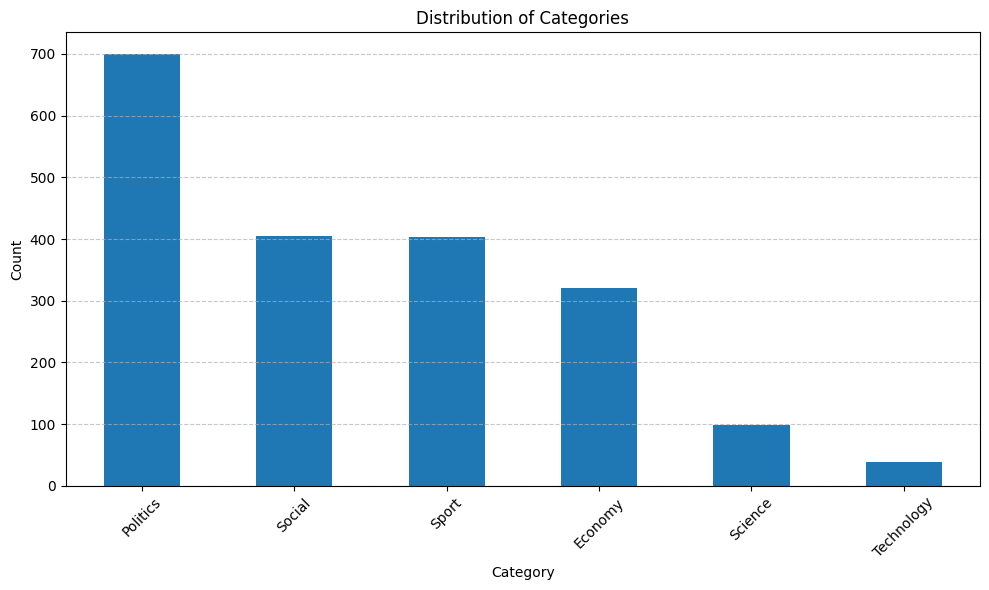

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named dff
category_counts = dff['Category'].value_counts()

# Plotting the graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()






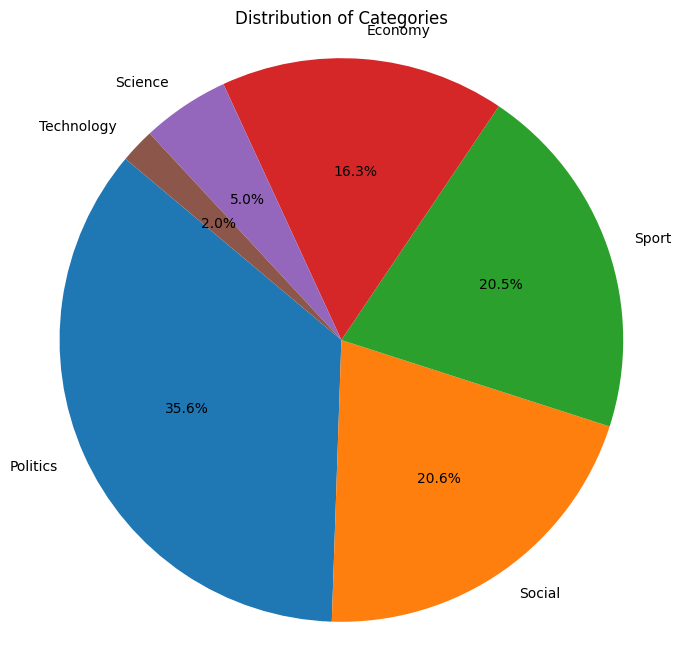

In [22]:
# Assuming your DataFrame is named dff
category_counts = dff['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [23]:
# save into a CSV file
dff.to_csv("Matsd24_news.csv", index=False)

print("Dataset created and saved as 'fake_news_dataset_socio.csv'.")

Dataset created and saved as 'fake_news_dataset_socio.csv'.
